# Lọc nhiễu sin tự động

Trong bài thực hành trên lớp, chúng ta đã tiến hành lọc nhiễu sin thủ công dựa trên tọa độ của điểm có cường độ sáng lớn. Trong bài tập về nhà, chúng ta cần đưa ra phương án xử lý mà không cần tìm tọa độ theo cách thủ công như vậy.

Gợi ý:
- Đọc ảnh xám
- Chuyển sang miền tần số
- Tìm tọa độ các điểm có giá trị lớn nhất cục bộ (trừ điểm chính giữa)
- So sánh với ngưỡng, nếu lớn hơn thì loại bỏ điểm đó (thay bằng giá trị nhỏ nhất)
- Chuyển về ảnh bình thường, kiểm tra kết quả

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

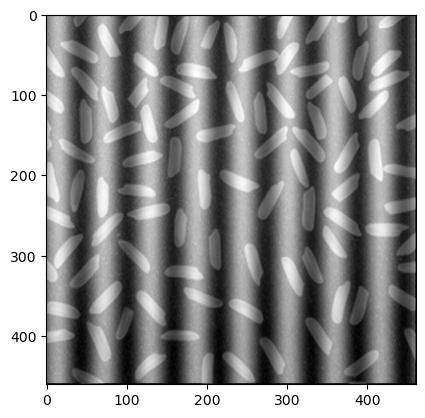

In [5]:
# read input as grayscale
img = cv2.imread('images/gao.png', 0)
plt.imshow(img, cmap='gray')
plt.show()

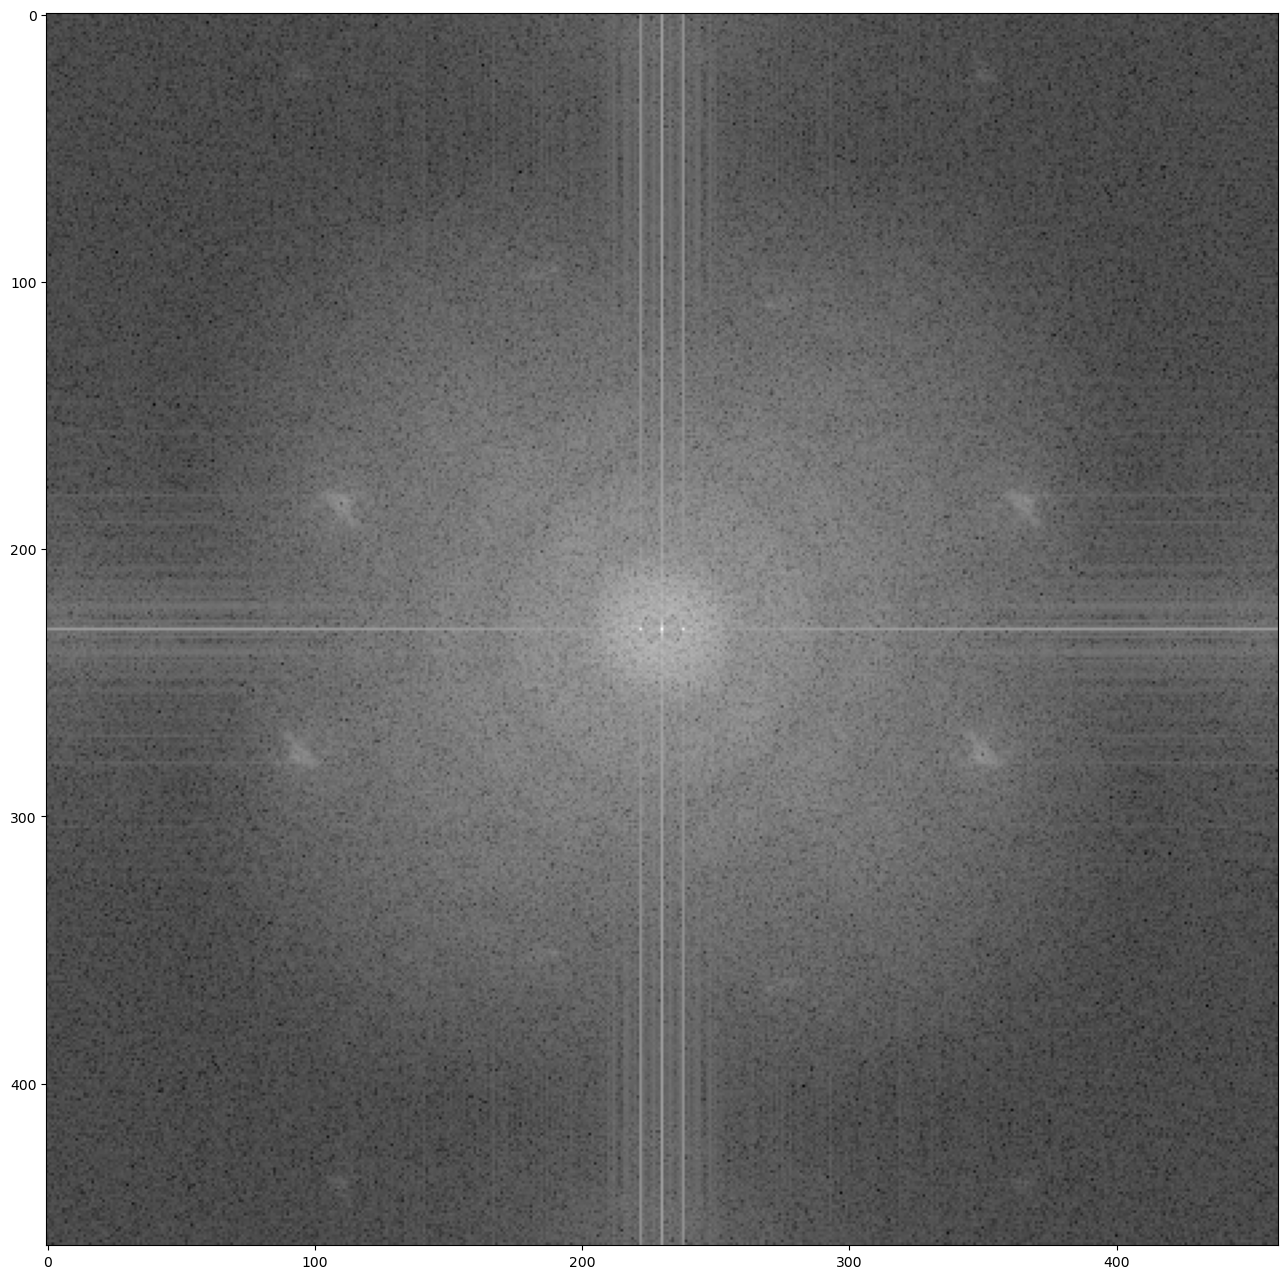

In [9]:
fft = np.fft.fft2(img)
shift_fft = np.fft.fftshift(fft)

# showing purpose only
mag_fft = np.log(np.abs(shift_fft))
plt.figure(figsize=(16,16))
plt.imshow(mag_fft, cmap='gray')
plt.show()

Yêu cầu: Hoàn thiện hàm local_maximum

Input:
- spec: phổ của ảnh đầu vào
- win_size: kích thước cửa sổ
- thresh: ngưỡng 

Output: max_pos - tọa độ cực đại địa phương cần loại bỏ

In [7]:
def local_maximum(spec,win_size,thresh):
    height, width = spec.shape
    mid_R, mid_C = int(height/2), int(width/2)
    max_pos = []
    for i in range(height):
        for j in range(width):
            if i == mid_R and j == mid_C: continue

            win_y_start = max(0, i - win_size[0] // 2)
            win_y_end = min(height, i + win_size[0] // 2 + 1)
            win_x_start = max(0, j - win_size[1] // 2)
            win_x_end = min(width, j + win_size[1] // 2 + 1)
    
            window = spec[win_y_start:win_y_end, win_x_start:win_x_end]
            if spec[i, j] == np.max(window) and spec[i, j] >= thresh:
                max_pos.append([i, j])

    return max_pos

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30284\665456166.py:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(shift_fft_filtered)), cmap='gray')


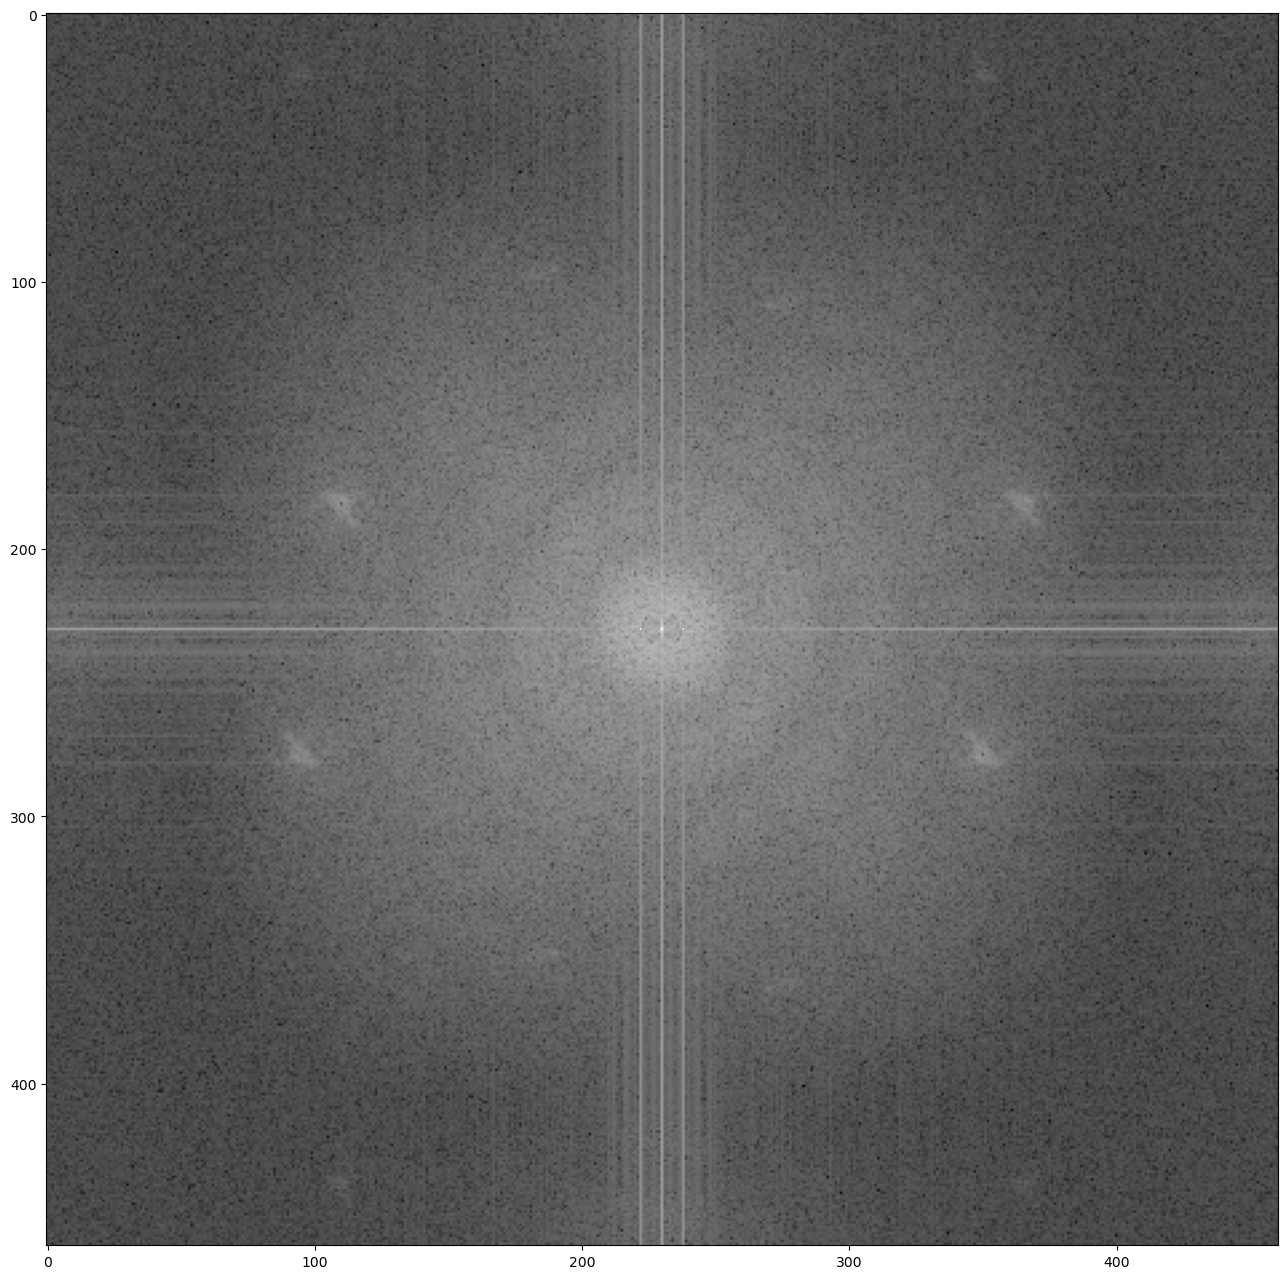

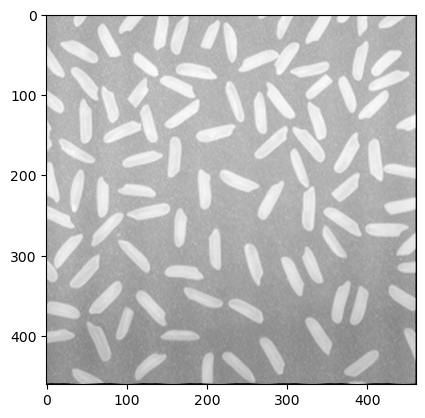

In [8]:
max_pos = local_maximum(mag_fft, win_size=[5, 5], thresh=15)
shift_fft_filtered = shift_fft.copy()

for pos in max_pos:
    shift_fft_filtered[pos[0], pos[1]] = 0

plt.figure(figsize=(16,16))
plt.imshow(np.log(np.abs(shift_fft_filtered)), cmap='gray')
plt.show()

shift_ifft = np.fft.ifftshift(shift_fft_filtered)
ifft = np.fft.ifft2(shift_ifft)
mag = np.abs(ifft)
plt.imshow(mag, cmap='gray')
plt.show()

# Xây dựng chuỗi xử lý nhiễu

Yêu cầu: Xây dựng một chuỗi xử lý chung cho nhiều loại nhiễu khác nhau, cần kết hợp các chiến thuật đã học một cách hợp lý, có thể thay đổi tham số truyền vào

## Ảnh cần xử lý

In [10]:
import cv2
import matplotlib.pyplot as plt
import os

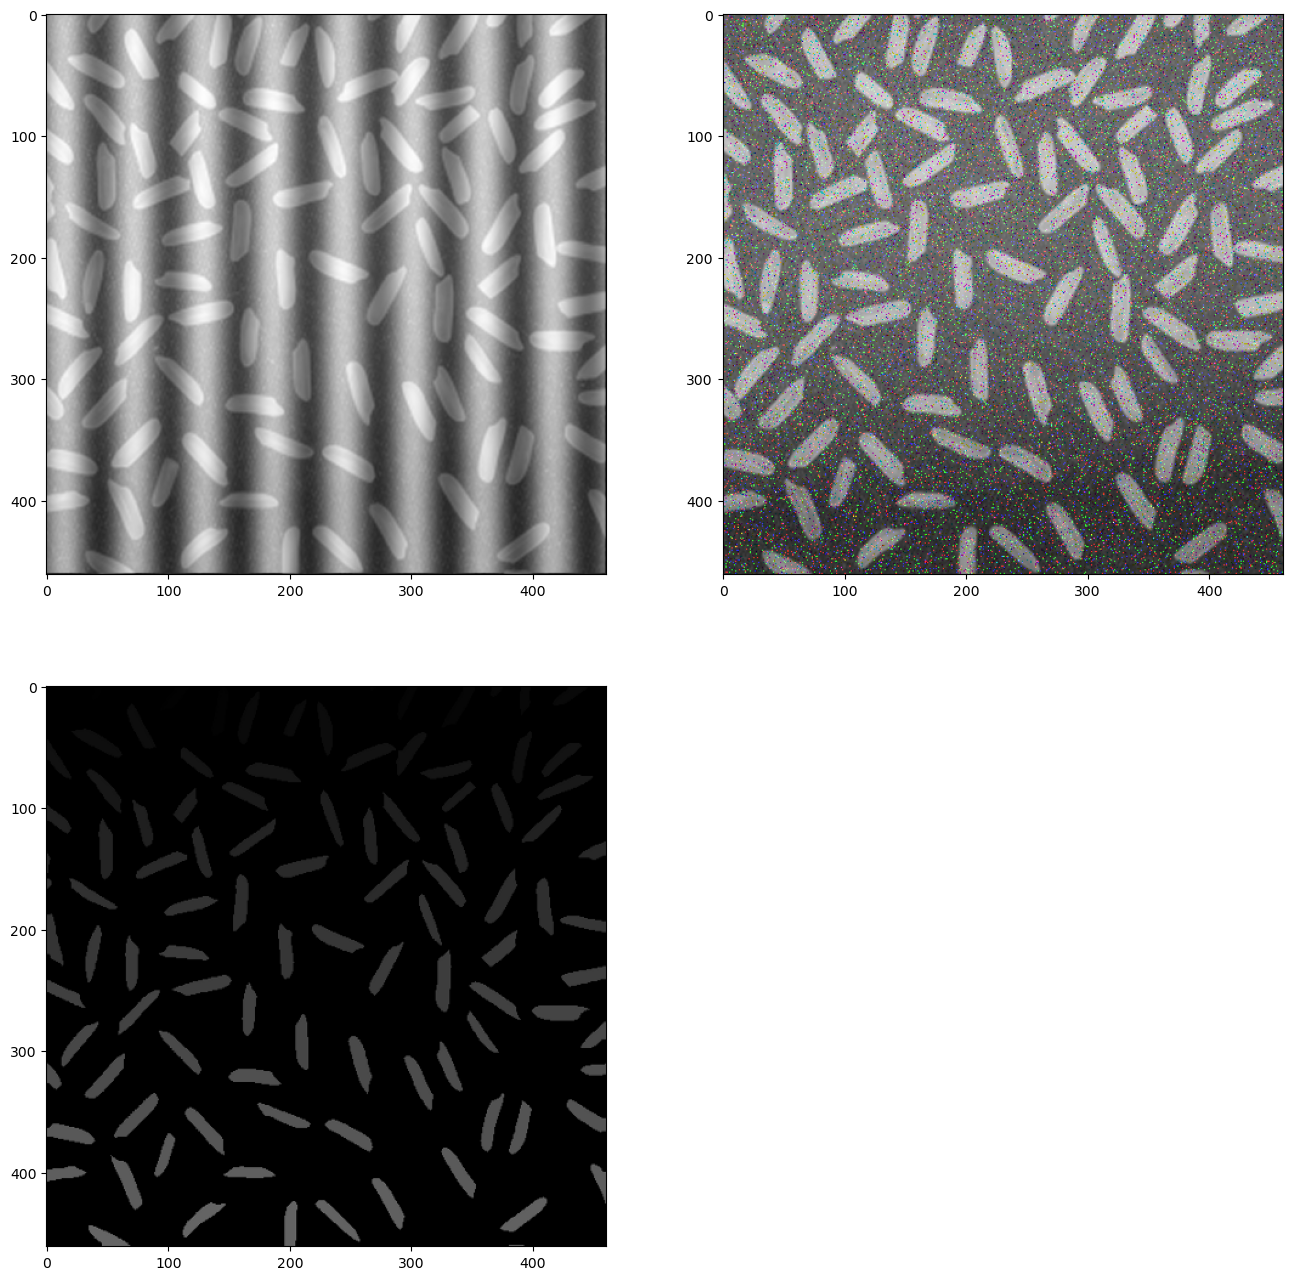

In [11]:
img_names = os.listdir('images/')
plt.figure(figsize=(16, 16)) 
for i, img_name in enumerate(img_names):
    img = cv2.imread(os.path.join('images/', img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # for showing purpose
    plt.subplot(2,2,i+1)
    plt.imshow(img) 
plt.show()

In [71]:
def denoise(img_name, gamma=1):
    img = cv2.imread('images/'+ img_name)
    median_filter = cv2.medianBlur(img, 3)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    fft = np.fft.fft2(gray)
    shift_fft = np.fft.fftshift(fft)

    mag_fft = np.log(np.abs(shift_fft) + 1)
    plt.figure(figsize=(5,5))
    plt.imshow(mag_fft, cmap = 'gray')
    max_pos = local_maximum(shift_fft, [5, 5], gamma)

    # xoá nhiễu do hàm sin
    for pos in max_pos:
        shift_fft[pos[0], pos[1]] = 0
    
    
    mag_fft = np.log(np.abs(shift_fft) + 1)
    plt.figure(figsize=(5,5))
    plt.imshow(mag_fft, cmap = 'gray')
        
    shift_ifft = np.fft.ifftshift(shift_fft)
    ifft = np.fft.ifft2(shift_ifft)

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(np.abs(ifft), cmap='gray')
    plt.show()

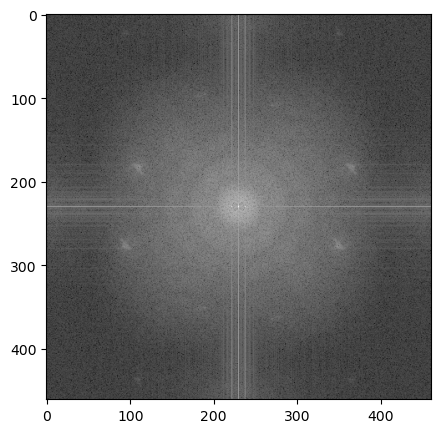

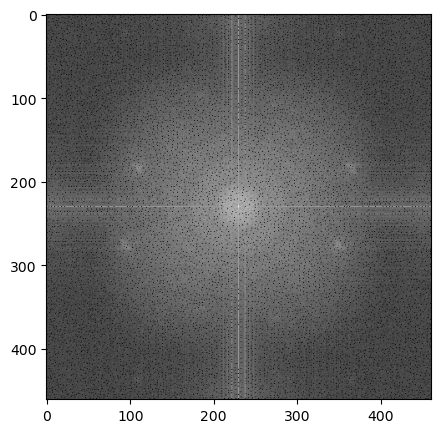

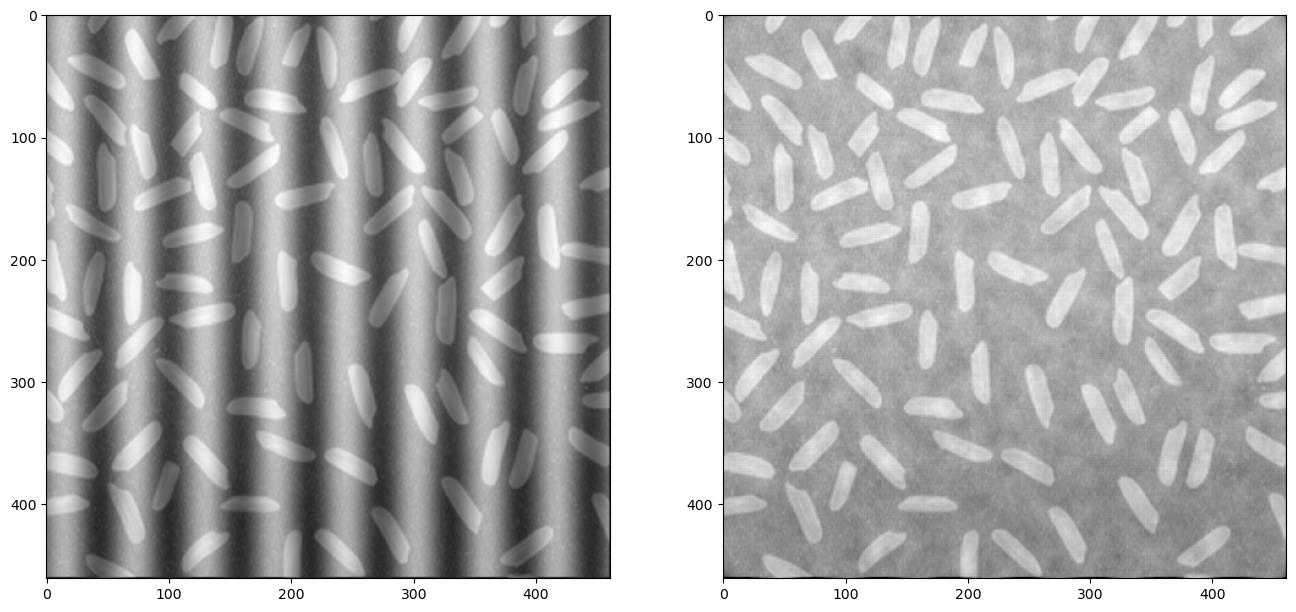

In [55]:
denoise('gao.png', 1)

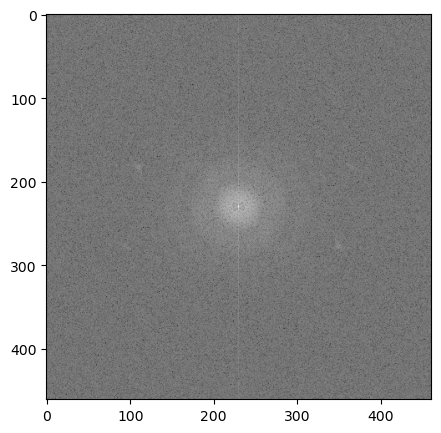

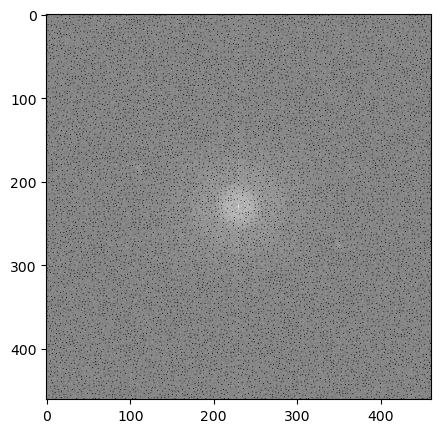

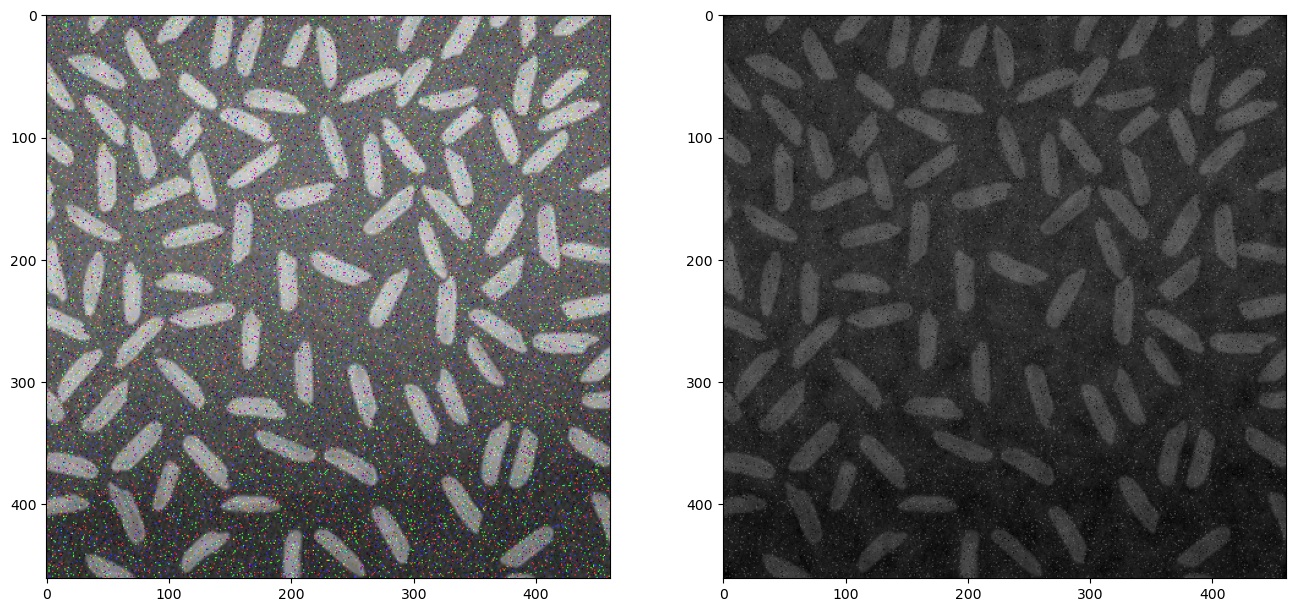

In [73]:
denoise('gao2.png',1)

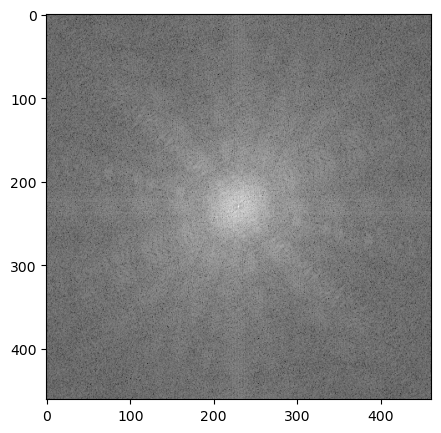

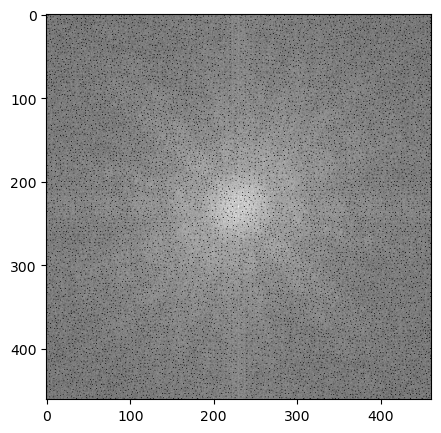

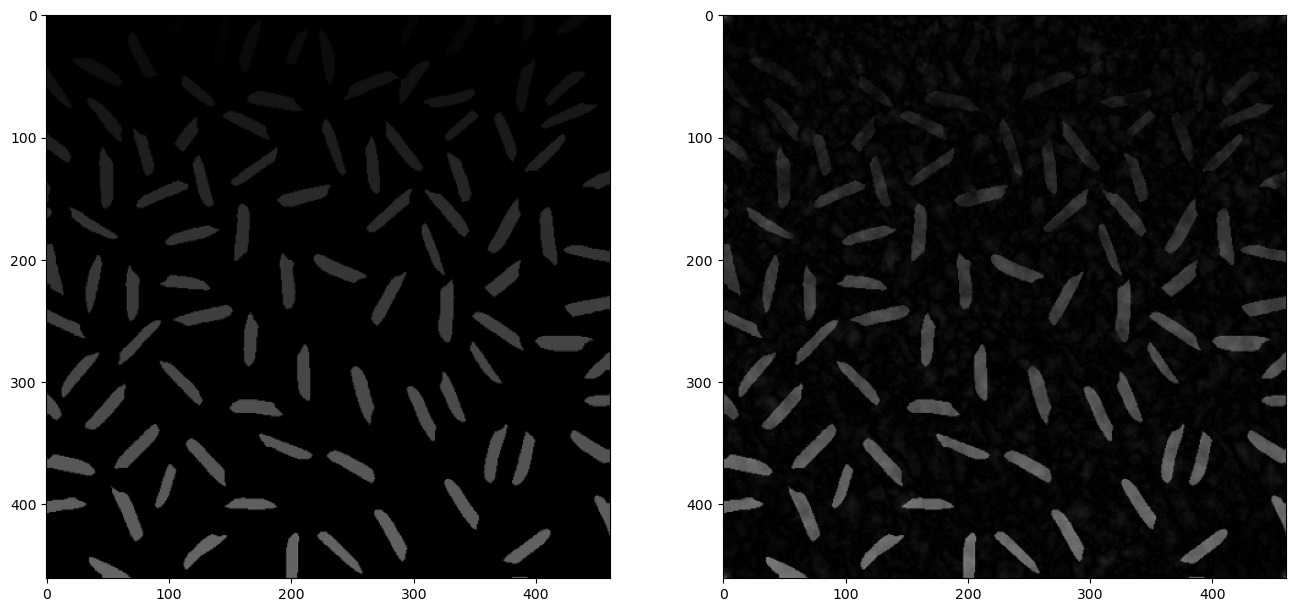

In [75]:
denoise('gao3.png',0.1)